## Gaussian Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Config parameters

N = 10                     # number of training points
n = 50                     # number of test points

sn = 0.02                  # noise variance #0.00005

kernel_param = 0.1         # rbf kernel parameter
gamma= 0.5/kernel_param    # Overall rbf_kernel() gamma

In [3]:
# Definition of the unknown function (sine) we are trying to approximate

f = lambda x: np.sin(0.9*x).flatten()

In [4]:
# Images centering
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:

def plot_f(x,y, title, symbol, color, size):
    plt.figure(1, figsize=size)
    plt.clf()
    plt.plot(x, y, symbol, color = color)
    plt.title(title)
    plt.axis([-5, 5, -4, 4])
    plt.grid()

#### Example

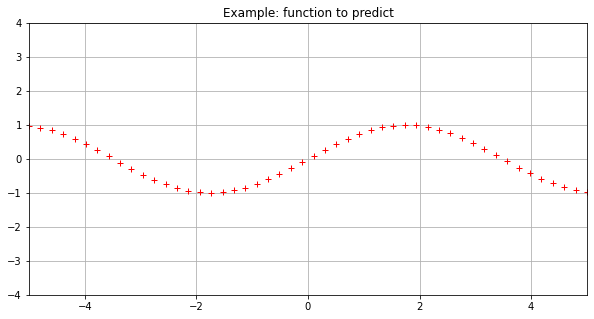

In [6]:
# Example 
Xe = np.linspace(-5,5, n)
Ye = f(Xe)

plot_f(Xe, Ye, 'Example: function to predict', symbol='+', color='r', size=(10, 5))

#### Test points

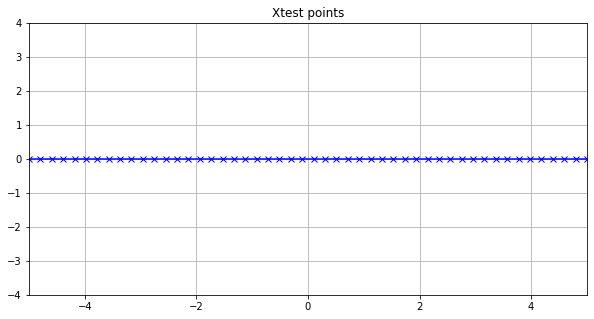

In [7]:
# We pick up n points equally spaced on x-axis in the range (-5, 5)
Xtest = np.linspace(-5,5, n).reshape(-1,1)

y = np.zeros(n)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, y, marker='x', color = 'b')
plt.title('Xtest points')
plt.axis([-5, 5, -4, 4])
plt.grid()

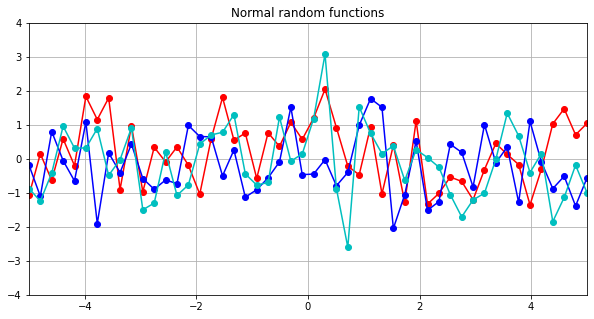

In [8]:
# We sample 3 times n random points from a standard normal 
sample_f = np.random.normal(size=(n,3))

plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(Xtest, sample_f[:,0], marker='o', color = 'r')
plt.plot(Xtest, sample_f[:,1], marker='o', color = 'b')
plt.plot(Xtest, sample_f[:,2], marker='o', color = 'c')
plt.title('Normal random functions')

plt.axis([-5, 5, -4, 4])
plt.grid()

In [9]:
# We calculate the covariance matrix (kernel) on the 50 equally spaced Xtest points 
Kss = rbf_kernel(Xtest, Xtest, gamma)

# Cholesky matrix calculation
Lss = np.linalg.cholesky(Kss + sn*np.eye(n))

# Note that Cholesky matrix is used to create correlations among random variables. 
# Suppose that x1 and x2 are independent standard normal variables. 
# The matrix Ls can be used to create new variables z1 and z2 such that the covariance of z1 and z2 equals Σ
# In particular, if you generate p standard normal variates, the Cholesky transformation maps the variables into variables
# for the multivariate normal distribution with covariance matrix Σ and centered at the origin (denoted MVN(0, Σ)).

# See proof below

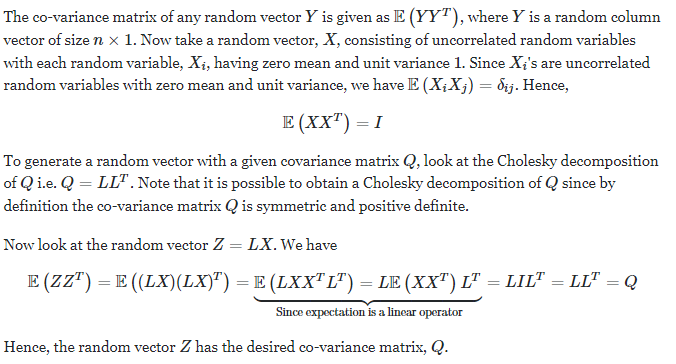

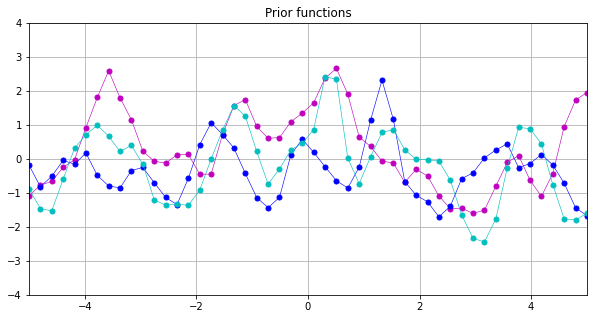

In [10]:
# By Cholesky trasformation we force the priors to have the same covariance matrix of the equally spaced Xtest points 

f_prior = np.dot(Lss, sample_f)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)
plt.title('Prior functions')
plt.axis([-5, 5, -4, 4])
plt.grid()

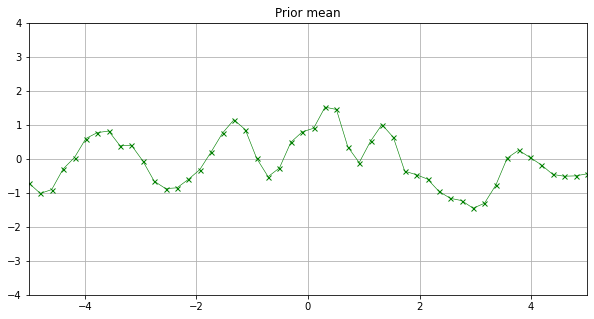

In [11]:
# The resulting priors have mean at each x that tends to zero wwith increasing n

prior_mean = f_prior.mean(axis=1)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, prior_mean, marker='x', color = 'g', linewidth=0.6, markersize=5)
plt.title('Prior mean')
plt.axis([-5, 5, -4, 4])
plt.grid()

#### Train points

Xtrain:
[[-3.57142857]
 [ 4.18367347]
 [-2.75510204]
 [ 3.36734694]
 [ 1.73469388]
 [ 0.30612245]
 [ 2.34693878]
 [ 3.97959184]
 [-0.30612245]
 [-3.16326531]]
f(Xtrain):
[ 0.07262906 -0.58405346 -0.61469625  0.11075273  0.99995419  0.27203793
  0.85696302 -0.42597565 -0.27203793 -0.29040866]
y = f(X) + noise: 
[ 0.09910089 -0.5723951  -0.6293728   0.08280661  0.9711826   0.24185174
  0.87399843 -0.42480313 -0.29423838 -0.28141702]


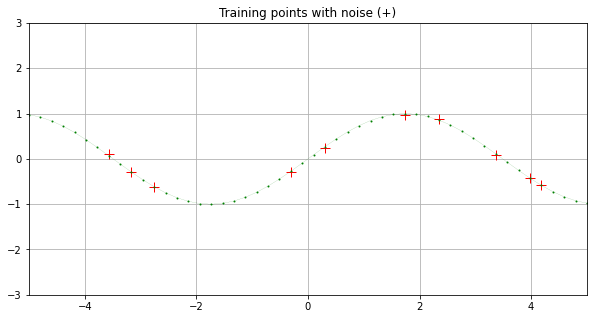

In [12]:
# The unknown underling function over the test points is
Yunknown = f(Xtest)

# We sample now some input points without noise from the initial unknown sine function and we use them as training points 
# to adjust our prior functions

Xtrain = np.random.choice(Xtest.ravel(), size=(N, 1), replace=False)
print('Xtrain:')
print(Xtrain)

fx = f(Xtrain)
print('f(Xtrain):')
print(fx)

# By adding the noise component the corresponding y=f(x) for the train points is

Ytrain = fx + sn*np.random.randn(N)

print('y = f(X) + noise: ')
print(Ytrain)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtrain, Ytrain, '+', color = 'r', ms=10)
plt.plot(Xtest, Yunknown, marker='o', color = 'g', linewidth=0.1, markersize=1)
plt.title('Training points with noise (+)')
plt.axis([-5, 5, -3, 3])
plt.grid()


### Theory overview

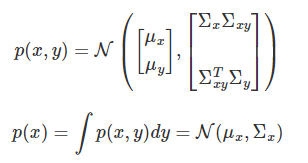

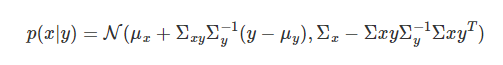

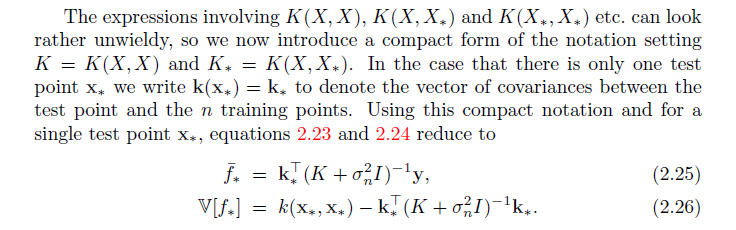

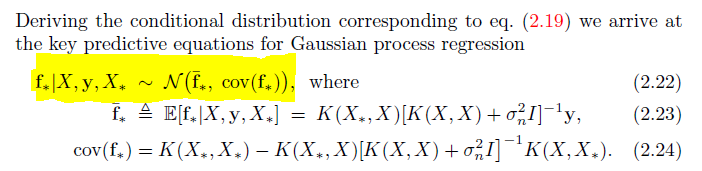

In [13]:
# By using the Cholesky decomposition we have:

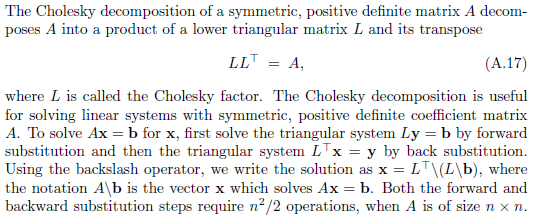

In [14]:
# The algorithm is:

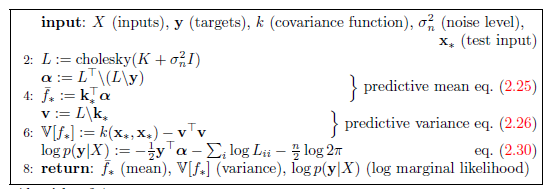

In [15]:
# Compute mean at our train points
K = rbf_kernel(Xtrain, Xtrain, gamma)
L = np.linalg.cholesky(K + sn*np.eye(len(Xtrain)))

Ly = np.linalg.solve(L, Ytrain)
alpha = np.linalg.solve(L.T, Ly)

Ks = rbf_kernel(Xtrain, Xtest, gamma)

meanFs = np.dot(Ks.T, alpha)

print('Predictive mean eq.2.25')
print(meanFs.shape)
print(meanFs)



# Compute the variance and standard deviation at our train points
v = np.linalg.solve(L, Ks)
covFs = Kss - np.dot(v.T, v)   # Covariance matrix
varFs = np.diag(covFs)         # np.diag gets the diagonal elements (variance) from argument matrix
stdFs = np.sqrt(varFs)
print('\nPredictive variance, diagonal of eq.2.26')
print(meanFs.shape)
print(varFs)

Predictive mean eq.2.25
(50,)
[ 5.84960147e-06  8.75818092e-05  8.63465677e-04  5.59546809e-03
  2.37264698e-02  6.50249089e-02  1.10600075e-01  9.59381254e-02
 -3.82527504e-02 -2.79512013e-01 -5.25639462e-01 -6.17733352e-01
 -4.86317204e-01 -2.56326982e-01 -8.98344948e-02 -2.08432575e-02
 -3.20655589e-03 -5.07032528e-04 -1.83940513e-03 -1.18380304e-02
 -5.07406692e-02 -1.42610983e-01 -2.59049841e-01 -2.87605390e-01
 -1.44537136e-01  8.88473369e-02  2.36112128e-01  2.21650041e-01
  1.27565800e-01  7.39788806e-02  1.39923228e-01  3.71781945e-01
  7.10214138e-01  9.54335698e-01  1.00119984e+00  9.58723762e-01
  8.59405826e-01  6.25794240e-01  3.35737714e-01  1.51791524e-01
  9.82204730e-02  8.09943573e-02  3.72027037e-03 -1.81556732e-01
 -4.25849302e-01 -5.60275356e-01 -4.68827917e-01 -2.55374104e-01
 -9.11317625e-02 -2.13610828e-02]

Predictive variance, diagonal of eq.2.26
(50,)
[1.         0.99999962 0.99996304 0.99844454 0.97184388 0.7833636
 0.30237041 0.01950489 0.07877195 0.019395

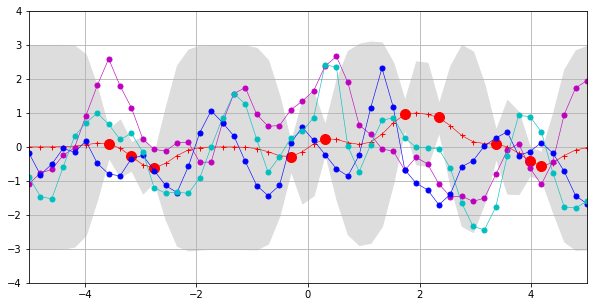

In [16]:
# Let's plot the mean and the standard deviation
plt.figure(1, figsize=(10, 5))
plt.clf()

# Plot train points
plt.plot(Xtrain, Ytrain, 'ro', ms=10)

# Plot posterior mean
plt.plot(Xtest, meanFs, 'r', marker='+', color = 'r', linewidth=0.6, markersize=5)

# Plot posterior confidence region
plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

# Plot (unconstrained) priors
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)

plt.axis([-5, 5, -4, 4])
plt.grid()


# As we can see below the sampled priors are  not constrained to pass through the train points 

In [17]:
# We sample now 3 regression functions from the posterior distribution

f_post = np.random.multivariate_normal(meanFs, covFs, 3).T
f_post

array([[-1.26816544,  1.29200108,  0.25011896],
       [-0.36398933,  1.77832592, -0.42355165],
       [-0.19294598,  1.21854727, -0.68378576],
       [-0.27922642,  0.05753154, -0.60665378],
       [-0.10049924, -0.4177734 , -0.74750258],
       [ 0.40081982,  0.24898681, -0.88175981],
       [ 0.61749591,  0.59432224, -0.64319241],
       [ 0.04501922,  0.05463959, -0.08302295],
       [-0.46359117, -0.50491787,  0.30655015],
       [-0.35061107, -0.58362586, -0.00744429],
       [-0.51459382, -0.69742144, -0.68026338],
       [-0.89117591, -0.59727372, -0.61096747],
       [-0.45783203, -0.27251797,  0.17491131],
       [ 0.19132993, -0.43707298,  0.27444265],
       [ 0.09750315, -0.69436359, -0.05013616],
       [-0.32981329, -0.94940714,  0.17321405],
       [-0.30522009, -1.56515418,  0.57341106],
       [ 0.69321179, -1.86339781,  1.00682961],
       [ 1.91241849, -1.58787542,  1.43639783],
       [ 1.69109743, -0.97543664,  1.12493588],
       [ 0.27074868, -0.34722342,  0.013

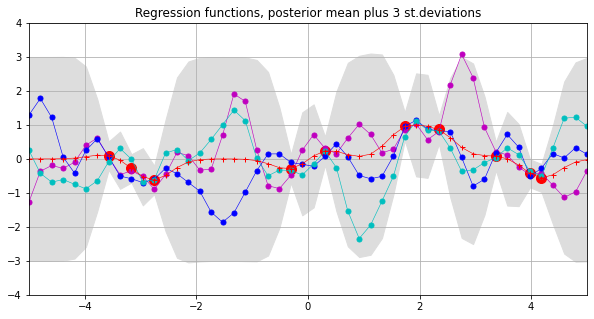

In [18]:
# Plot the functions sampled from the posterior distribution

plt.figure(1, figsize=(10, 5))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)

plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

plt.plot(Xtest, meanFs, marker='+', color='r', markersize=5, linewidth=0.6)

plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.axis([-5, 5, -4, 4])
plt.grid()

In [19]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 